In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from data_loader import load_dataset

Matplotlib is building the font cache; this may take a moment.


In [2]:
dataset = load_dataset()

In [3]:
dataset.head()

,Page,Date,Views
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,NaN


In [7]:
dataset.shape

(79784650, 3)

In [6]:
missing_values = dataset.isnull().sum()
missing_values

Page           0
Date           0
Views    6192931
dtype: int64

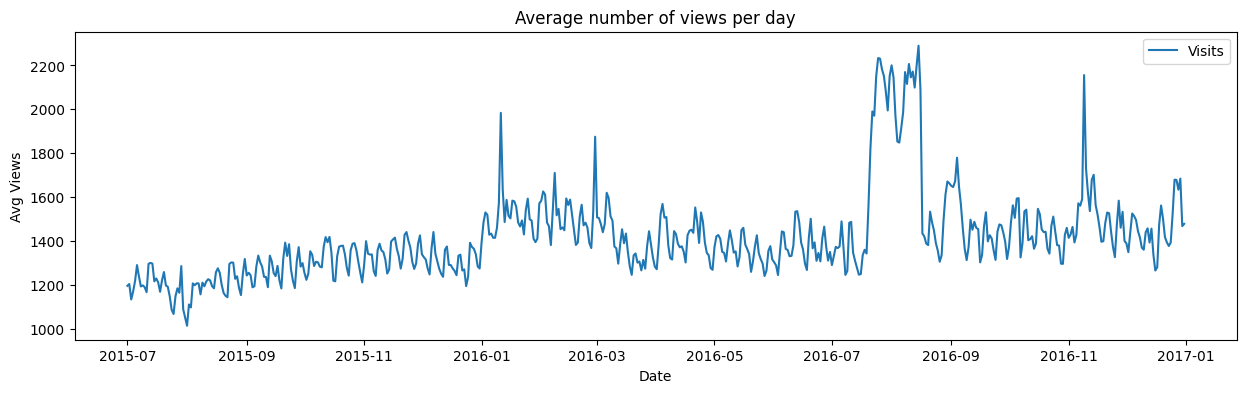

In [9]:
temp = dataset.groupby('Date')['Views'].mean()
plt.figure(figsize = (15,4))
plt.xlabel('Date')
plt.ylabel('Avg Views')
plt.title('Average number of views per day')
plt.plot(temp,label='Visits')
plt.legend()
plt.show()

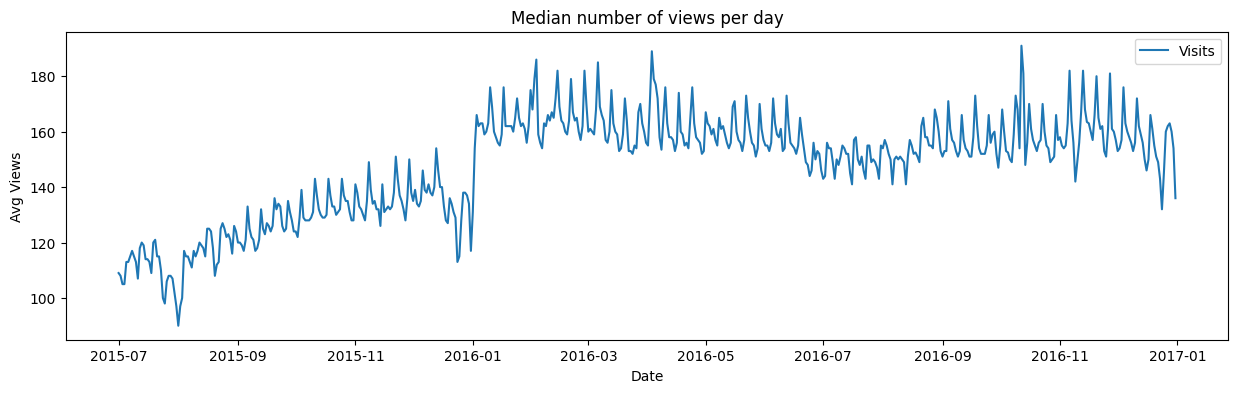

In [10]:
temp = dataset.groupby('Date')['Views'].median()
plt.figure(figsize = (15,4))
plt.xlabel('Date')
plt.ylabel('Avg Views')
plt.title('Median number of views per day')
plt.plot(temp,label='Visits')
plt.legend()
plt.show()

In [11]:
# top 10 pages with maximum number of views
top_pages = dataset.groupby('Page')['Views'].sum().reset_index()
top_pages_list = top_pages.nlargest(10,'Views')['Page'].tolist()

In [12]:
top5_pages_df = dataset[dataset['Page'].isin(top_pages_list)]
top5_pages_df.head()

,Page,Date,Views
9774,Main_Page_en.wikipedia.org_desktop_all-agents,2015-07-01,11952559.0
10403,Special:Search_en.wikipedia.org_desktop_all-ag...,2015-07-01,1628266.0
27330,Wikipédia:Accueil_principal_fr.wikipedia.org_a...,2015-07-01,1620421.0
38573,Main_Page_en.wikipedia.org_all-access_all-agents,2015-07-01,20381245.0
39180,Special:Search_en.wikipedia.org_all-access_all...,2015-07-01,2034850.0


In [23]:
dataset['year']=dataset.Date.dt.year
dataset['month']=dataset.Date.dt.month
dataset['day']=dataset.Date.dt.day

dataset['month_num'] = dataset['month']
dataset['month'].replace('9','9 - September',inplace=True)
dataset['month'].replace('10','10 - October',inplace=True)
dataset['month'].replace('11','11 - November',inplace=True)
dataset['month'].replace('12','12 - December',inplace=True)

dataset['weekday'] = dataset['Date'].apply(lambda x: x.weekday())

dataset['weekday#'] = dataset['weekday']
dataset['weekday'].replace(0,'01 - Monday',inplace=True)
dataset['weekday'].replace(1,'02 - Tuesday',inplace=True)
dataset['weekday'].replace(2,'03 - Wednesday',inplace=True)
dataset['weekday'].replace(3,'04 - Thursday',inplace=True)
dataset['weekday'].replace(4,'05 - Friday',inplace=True)
dataset['weekday'].replace(5,'06 - Saturday',inplace=True)
dataset['weekday'].replace(6,'07 - Sunday',inplace=True)


/var/folders/vq/zq0yknjj0sn2jy9pm9md1_tw0000gn/T/ipykernel_2735/265796185.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['month'].replace('9','9 - September',inplace=True)
/var/folders/vq/zq0yknjj0sn2jy9pm9md1_tw0000gn/T/ipykernel_2735/265796185.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [24]:
train_group = dataset.groupby(["month", "weekday"])['Views'].mean().reset_index()
train_group = train_group.pivot(index='weekday', columns='month',values='Views')
train_group.sort_index(inplace=True)

In [28]:
import seaborn as sns

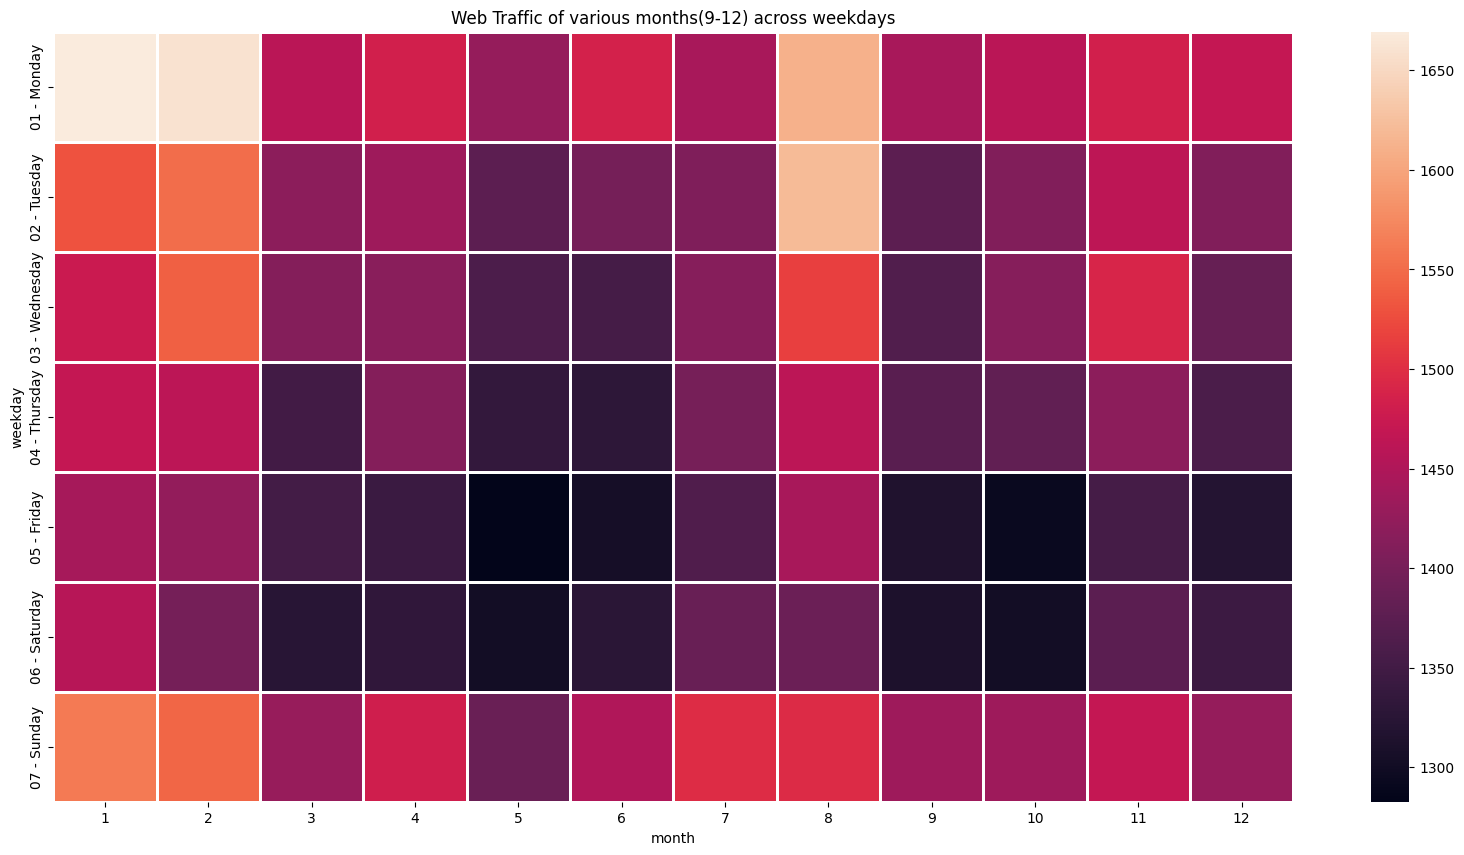

In [29]:
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(train_group, annot=False, ax=ax, fmt="d", linewidths=2)
plt.title('Web Traffic of various months(9-12) across weekdays')
plt.show()